In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import torch
import torch.nn as nn
import torch.optim as optim

torch.set_default_dtype(torch.float64)

In [2]:
df = pd.read_csv("./data_synthetic/synth_data_1var_lin.csv", index_col=0)
df

,X,y
0,0.000000,0.037750
1,0.010101,0.099744
2,0.020202,0.142239
3,0.030303,0.120033
4,0.040404,0.187749
...,...,...
95,0.959596,2.974688
96,0.969697,2.962637
97,0.979798,2.960849
98,0.989899,3.005870


In [3]:
X = torch.tensor(df["X"]).reshape(-1, 1)
y = torch.tensor(df["y"]).reshape(-1, 1)

In [4]:
class NN(nn.Module):

    def __init__(self):
        super(NN, self).__init__()
        self.hidden = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.output = nn.Linear(10, 1)
    
    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = torch.tensor(X_train).reshape(-1,1)
y_train = torch.tensor(y_train).reshape(-1,1)

C:\Users\kyle\AppData\Local\Temp\ipykernel_14964\1084140955.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).reshape(-1,1)
C:\Users\kyle\AppData\Local\Temp\ipykernel_14964\1084140955.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train).reshape(-1,1)


In [6]:
model = NN()
model.load_state_dict(torch.load('nn_model_1Var_lin.pt'))

y_pred_NN = model(X)

C:\Users\kyle\AppData\Local\Temp\ipykernel_14964\290216920.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('nn_model_1Var_lin.pt'))


In [7]:
h = np.vectorize(lambda x : x) # modify h as needed
h_inv = np.vectorize(lambda x : x)

regr = LinearRegression()
regr.fit(X_train, h(y_train))

y_pred_GLM = h_inv(regr.predict(X))

In [8]:
# sorted_indices = torch.argsort(X_test, dim=0).squeeze()
# X_test = X_test[sorted_indices]
# y_pred_NN = y_pred_NN[sorted_indices]
# y_pred_GLM = y_pred_GLM[sorted_indices]

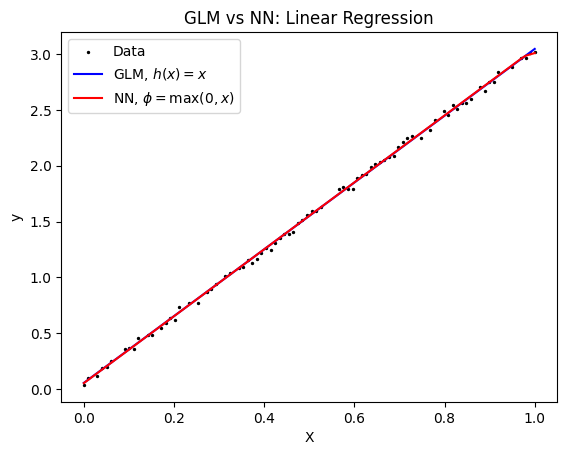

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color="black",s=2, label='Data')
plt.plot(X, y_pred_GLM, color='blue', label=r'GLM, $h(x) = x$')
plt.plot(X, y_pred_NN.detach(), color="red", label=r'NN, $\phi = \max(0,x)$')

plt.xlabel("X")
plt.ylabel("y")
plt.title(r"GLM vs NN: Linear Regression")
plt.savefig(f"img/GLM-NN_1Var_lin.png")
plt.legend()
plt.show()